# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [24]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns = ['WaterworksName', 'TankExploitation'])
missing_percentages = (df.isnull().sum() / len(df)) * 100

display(missing_percentages)


for key, value in missing_percentages.items():
    if (value > 40):
        df = df.drop(key, axis=1)

TotalFilters                  0.000000
MaxTypicalFlow               20.253165
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
AverageBackwashVolume        12.658228
PrimaryTrigger                0.000000
AverageTotalFilterDepth      41.772152
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageFilterBedVolume       43.037975
FilterExploitation           20.253165
AerationType                  0.000000
OxygenFactor                  0.000000
Stage1HLR                    26.582278
TotalEBCT                    49.367089
Footprint                     5.063291
SumOfld_layer                49.367089
UniformityCoefficient        64.556962
UFRV                          8.860759
BW%                          16.455696
HLR_BW                       34.177215
TankCapacity                  5.063291
GravityPressureMixed          0.000000
Stages                        0.000000
AbstractedVolume              0.000000
dtype: float64

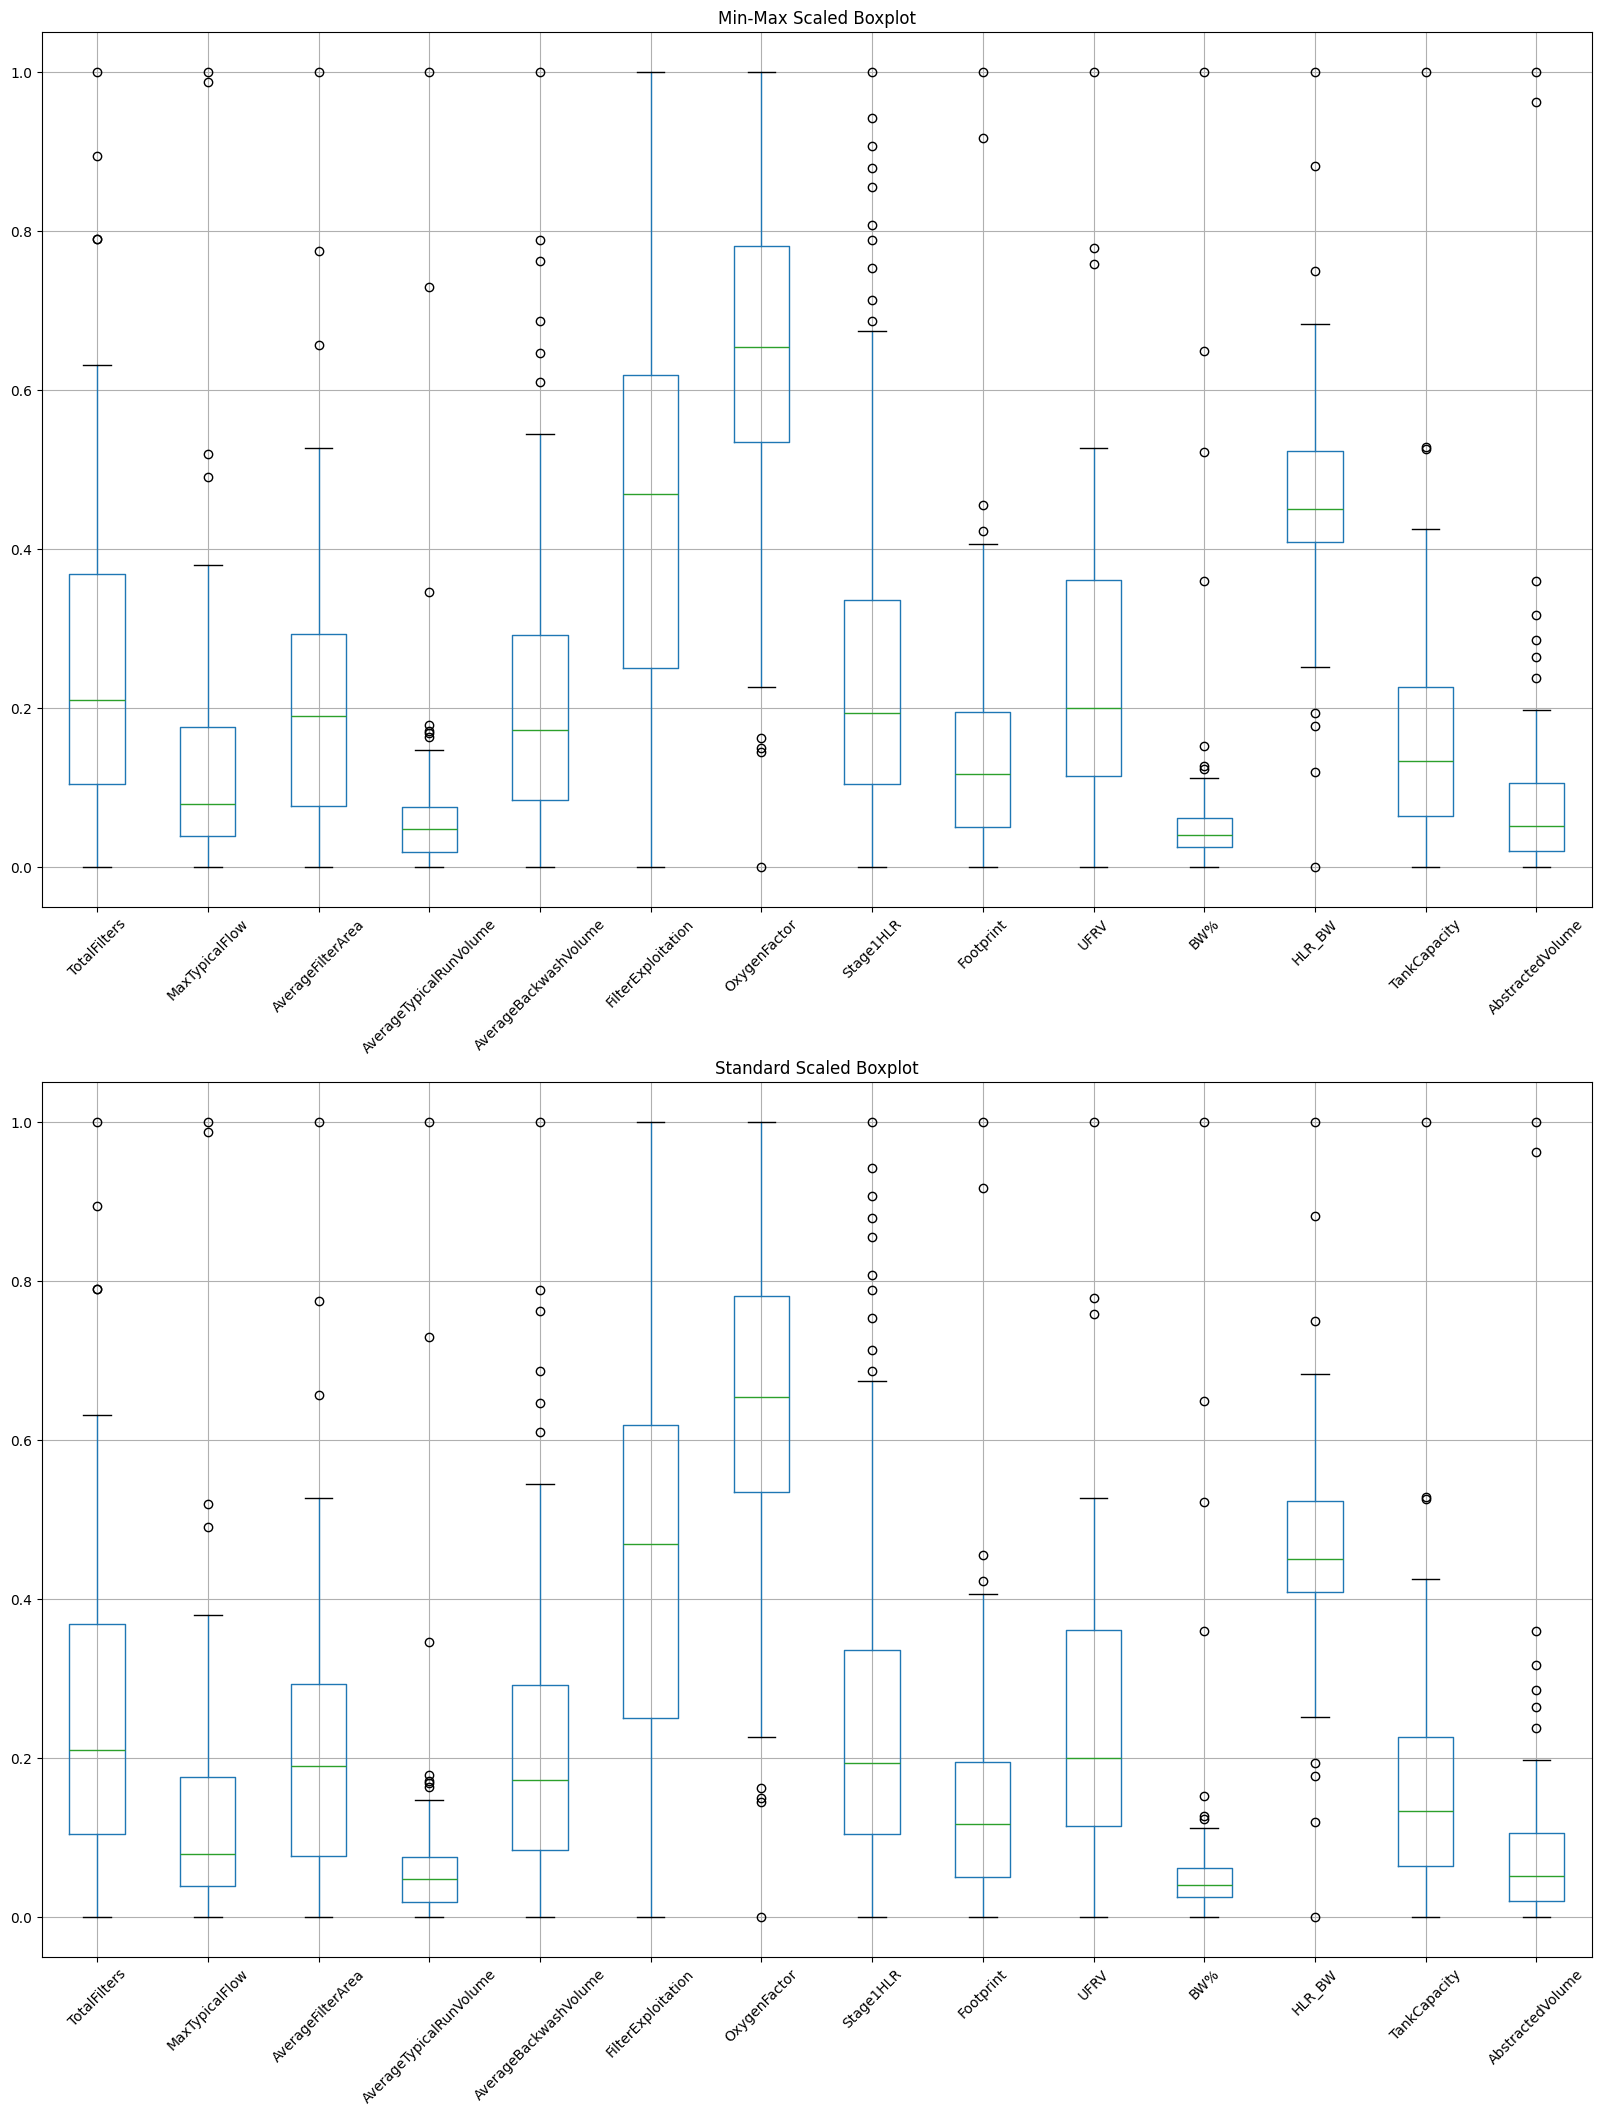

In [26]:
numeric_columns = df.select_dtypes(include=['number'])
scaler = MinMaxScaler()
s_scaler = StandardScaler()
# transform data
min_max = scaler.fit_transform(numeric_columns)
standard = s_scaler.fit_transform(numeric_columns)

min_max_df = pd.DataFrame(min_max, columns=numeric_columns.columns)
standard_df = pd.DataFrame(min_max, columns=numeric_columns.columns)

# Plotting boxplots
plt.figure(figsize=(20, 25))

plt.subplot(2, 1, 1)
min_max_df.boxplot()
plt.title('Min-Max Scaled Boxplot')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
standard_df.boxplot()
plt.title('Standard Scaled Boxplot')
plt.xticks(rotation=45)

plt.show()

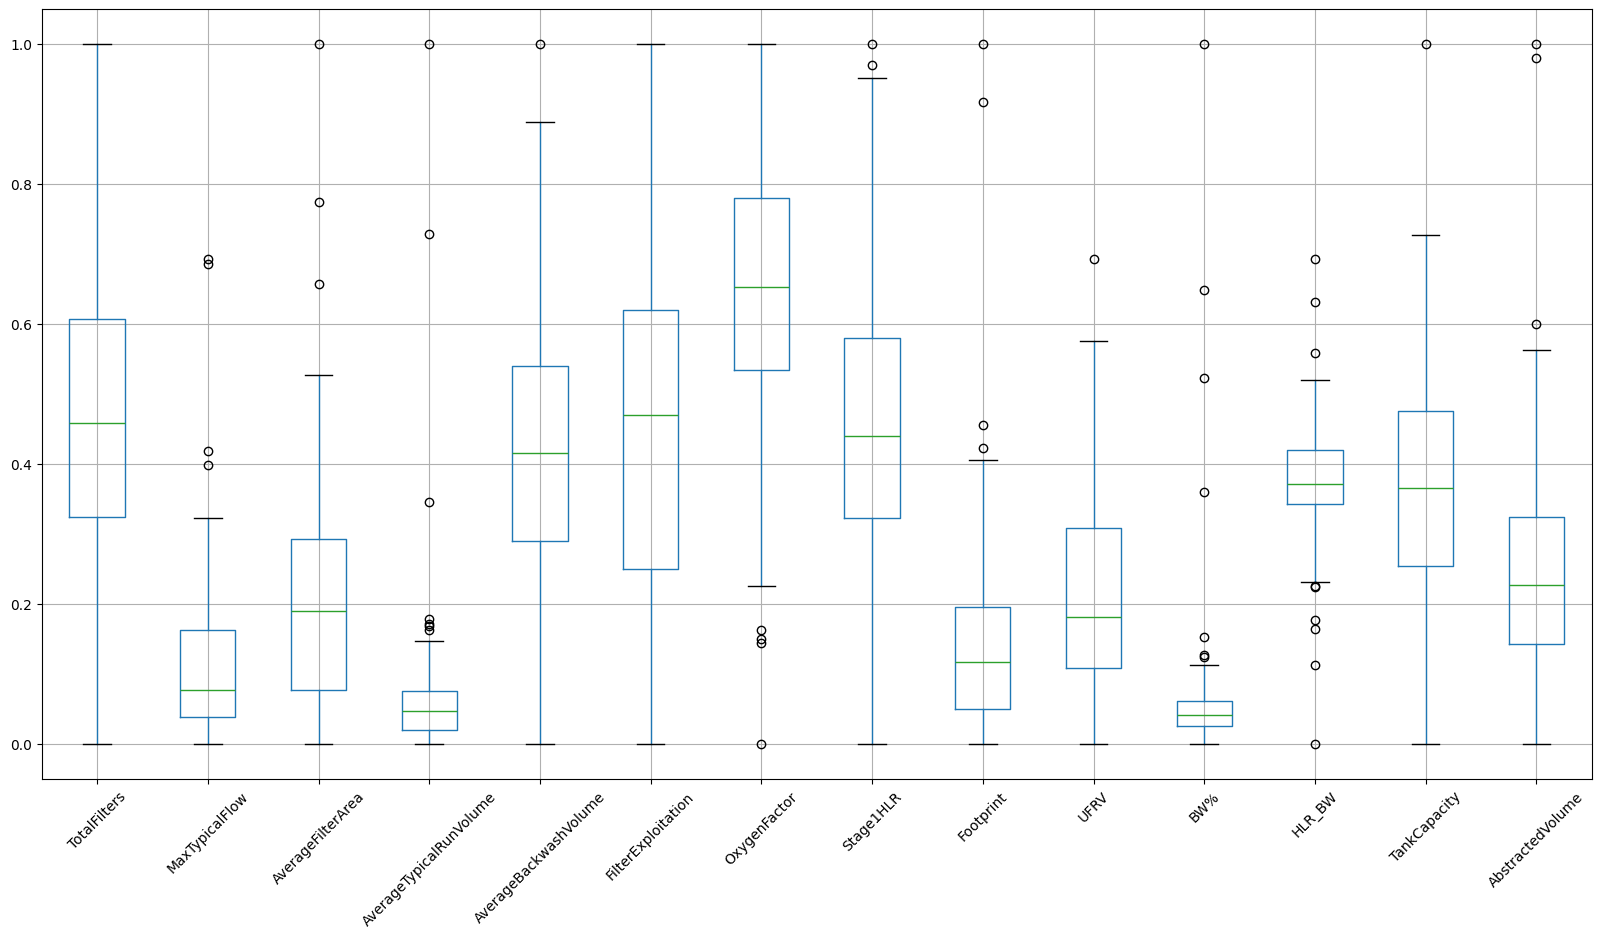

In [27]:
# transforming the skewed columns

# strongly skewed
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['MaxTypicalFlow', 'UFRV', 'HLR_BW'])])
df_log = pd.DataFrame(logTr.fit_transform(standard_df))

# slightly skewed
sqrtTr = ColumnTransformer(transformers=[("sqrt", FunctionTransformer(np.sqrt), ['TotalFilters', 'Stage1HLR', 'AbstractedVolume', 'TankCapacity', 'AverageBackwashVolume'])])
df_sqrt = pd.DataFrame(sqrtTr.fit_transform(standard_df))

standard_df[['MaxTypicalFlow', 'UFRV', 'HLR_BW']] = df_log
standard_df[['TotalFilters', 'Stage1HLR', 'AbstractedVolume', 'TankCapacity', 'AverageBackwashVolume']] = df_sqrt

plt.figure(figsize=(20, 10))

standard_df.boxplot()
plt.xticks(rotation=45)

plt.show()




OverallFilterGrainSizeMin, OverallFilterGrainSizeMax, AverageFilterBedVolume

In [28]:
# maybe we should not use K-NN imputing because of the outliers in the dataset

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(standard_df)
df_imputed = pd.DataFrame(imputed, columns=standard_df.columns)

display(standard_df)
display(df_imputed)

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,AbstractedVolume
0,0.512989,0.030184,0.100245,0.078884,0.233492,0.416917,0.610390,0.195900,0.306610,0.564279,0.009651,NaN,0.513191,0.146837
1,0.397360,0.070377,0.076834,0.000797,0.401479,0.472130,0.399351,0.828498,0.018993,0.000000,0.649245,0.368390,0.000000,0.229958
2,0.397360,0.076922,0.300703,0.056574,0.699206,0.485718,0.880952,0.454394,0.082545,0.175108,0.059990,0.391013,0.452873,0.242930
3,0.229416,NaN,0.314779,0.015139,0.386437,NaN,0.767316,NaN,0.423011,0.030962,0.059277,NaN,0.326056,0.114577
4,0.229416,NaN,0.003597,0.000000,0.148074,NaN,0.150433,NaN,0.917517,0.109846,0.049401,NaN,0.727280,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.888523,0.693147,1.000000,NaN,0.804432,0.748210,0.339827,0.541113,0.035784,NaN,0.002966,NaN,0.265196,1.000000
75,1.000000,0.686535,0.189893,0.067729,0.577094,0.725743,0.816017,0.634880,0.031114,0.313667,0.032938,0.559217,0.192121,0.980907
76,0.512989,0.158319,0.288016,0.033171,0.548506,0.039153,0.442641,0.364895,0.455919,0.102265,0.123820,0.366443,0.459203,0.190775
77,0.760886,NaN,0.774684,0.066135,0.888444,NaN,0.870130,NaN,0.327445,0.047284,1.000000,0.383593,NaN,0.363803


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,AbstractedVolume
0,0.512989,0.030184,0.100245,0.078884,0.233492,0.416917,0.610390,0.195900,0.306610,0.564279,0.009651,0.287786,0.513191,0.146837
1,0.397360,0.070377,0.076834,0.000797,0.401479,0.472130,0.399351,0.828498,0.018993,0.000000,0.649245,0.368390,0.000000,0.229958
2,0.397360,0.076922,0.300703,0.056574,0.699206,0.485718,0.880952,0.454394,0.082545,0.175108,0.059990,0.391013,0.452873,0.242930
3,0.229416,0.079027,0.314779,0.015139,0.386437,0.301324,0.767316,0.295593,0.423011,0.030962,0.059277,0.344940,0.326056,0.114577
4,0.229416,0.094375,0.003597,0.000000,0.148074,0.256868,0.150433,0.329462,0.917517,0.109846,0.049401,0.275588,0.727280,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.888523,0.693147,1.000000,0.056739,0.804432,0.748210,0.339827,0.541113,0.035784,0.082390,0.002966,0.388802,0.265196,1.000000
75,1.000000,0.686535,0.189893,0.067729,0.577094,0.725743,0.816017,0.634880,0.031114,0.313667,0.032938,0.559217,0.192121,0.980907
76,0.512989,0.158319,0.288016,0.033171,0.548506,0.039153,0.442641,0.364895,0.455919,0.102265,0.123820,0.366443,0.459203,0.190775
77,0.760886,0.147441,0.774684,0.066135,0.888444,0.268579,0.870130,0.412491,0.327445,0.047284,1.000000,0.383593,0.406501,0.363803


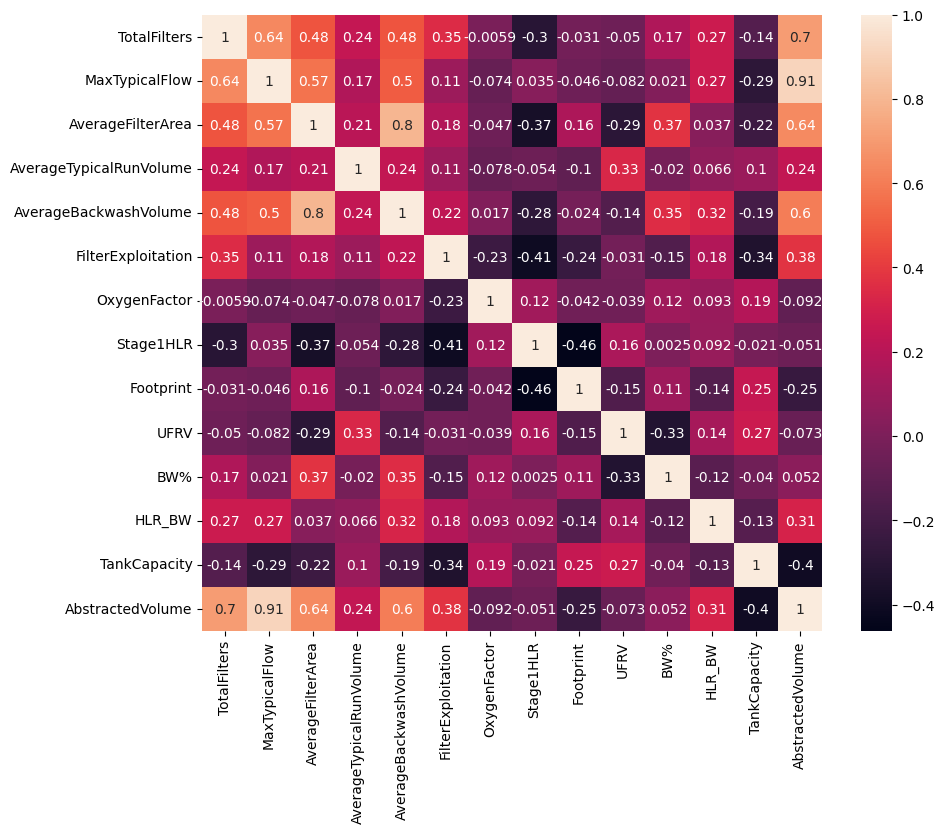

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,AbstractedVolume
0,0.512989,0.100245,0.078884,0.233492,0.416917,0.610390,0.195900,0.306610,0.564279,0.009651,0.287786,0.513191,0.146837
1,0.397360,0.076834,0.000797,0.401479,0.472130,0.399351,0.828498,0.018993,0.000000,0.649245,0.368390,0.000000,0.229958
2,0.397360,0.300703,0.056574,0.699206,0.485718,0.880952,0.454394,0.082545,0.175108,0.059990,0.391013,0.452873,0.242930
3,0.229416,0.314779,0.015139,0.386437,0.301324,0.767316,0.295593,0.423011,0.030962,0.059277,0.344940,0.326056,0.114577
4,0.229416,0.003597,0.000000,0.148074,0.256868,0.150433,0.329462,0.917517,0.109846,0.049401,0.275588,0.727280,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.888523,1.000000,0.056739,0.804432,0.748210,0.339827,0.541113,0.035784,0.082390,0.002966,0.388802,0.265196,1.000000
75,1.000000,0.189893,0.067729,0.577094,0.725743,0.816017,0.634880,0.031114,0.313667,0.032938,0.559217,0.192121,0.980907
76,0.512989,0.288016,0.033171,0.548506,0.039153,0.442641,0.364895,0.455919,0.102265,0.123820,0.366443,0.459203,0.190775
77,0.760886,0.774684,0.066135,0.888444,0.268579,0.870130,0.412491,0.327445,0.047284,1.000000,0.383593,0.406501,0.363803


In [29]:


plt.figure(figsize=(10, 8))
correlation_matrix = df_imputed.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.show()

# we could remove the columns that are highly correlated (1 or -1)
# maxtypicalflow -> abstracted volume

df_imputed = df_imputed.drop(columns = ['MaxTypicalFlow'])

display(df_imputed)

In [30]:

df = pd.concat([df.drop(columns=numeric_columns.columns), df_imputed], axis=1)

df_encoded = pd.get_dummies(df, columns=['PrimaryTrigger', 'GravityPressureMixed', 'AerationType'])
label_encoder = LabelEncoder()

# we will use label encoding for the stages and aeration type as they have hight cardinality (many unique values)
df_encoded['Stages_encoded'] = label_encoder.fit_transform(df_encoded['Stages'])

df_encoded = df_encoded.drop(columns=['Stages'])
display(df_encoded)

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,...,GravityPressureMixed_Pressure,AerationType_Air injection,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,Stages_encoded
0,0.512989,0.100245,0.078884,0.233492,0.416917,0.610390,0.195900,0.306610,0.564279,0.009651,...,False,False,False,True,False,False,False,False,False,2
1,0.397360,0.076834,0.000797,0.401479,0.472130,0.399351,0.828498,0.018993,0.000000,0.649245,...,True,True,False,False,False,False,False,False,False,0
2,0.397360,0.300703,0.056574,0.699206,0.485718,0.880952,0.454394,0.082545,0.175108,0.059990,...,False,False,True,False,False,False,False,False,False,0
3,0.229416,0.314779,0.015139,0.386437,0.301324,0.767316,0.295593,0.423011,0.030962,0.059277,...,False,False,False,True,False,False,False,False,False,2
4,0.229416,0.003597,0.000000,0.148074,0.256868,0.150433,0.329462,0.917517,0.109846,0.049401,...,False,False,False,True,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.888523,1.000000,0.056739,0.804432,0.748210,0.339827,0.541113,0.035784,0.082390,0.002966,...,False,False,False,True,False,False,False,False,False,0
75,1.000000,0.189893,0.067729,0.577094,0.725743,0.816017,0.634880,0.031114,0.313667,0.032938,...,True,False,False,False,False,False,False,True,False,2
76,0.512989,0.288016,0.033171,0.548506,0.039153,0.442641,0.364895,0.455919,0.102265,0.123820,...,False,False,True,False,False,False,False,False,False,2
77,0.760886,0.774684,0.066135,0.888444,0.268579,0.870130,0.412491,0.327445,0.047284,1.000000,...,False,False,False,True,False,False,False,False,False,0
